In [18]:
# numpy
import numpy as np
from numpy import random
random.rand(4,4)
randMat = np.mat(random.rand(4,4)) # convert np.array to np.matrix
randMat.I # inverse of matrix
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

# Logistic Regression
* Pros: 
    Computationally inexpensive, easy to implement, knowledge representation easy to interpret
* Cons:
    Prone to underfitting, may have low accuracy Works with: Numeric values, nominal values

## Optimization: gradient ascent

Pseudocode
<pre>
Start with the weights all set to 1:
Repeat R number of times:
    &nbsp;&nbsp;Calculate the gradient of the entire dataset
    Update the weights vector by alpha*gradient 
    Return the weights vector
</pre>

In [50]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('./data/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(intX):
    return 1.0/(1+np.exp(-intX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    m,n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

In [54]:
# test gradAscent
dataArr, labelMat = loadDataSet()
weights = gradAscent(dataArr,labelMat)

In [91]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1]); ycord1.append(dataArr[i, 2]);
        else:
            xcord1.append(dataArr[i, 1]); ycord1.append(dataArr[i, 2]); 
    fig = plt.figure()
    print(n)
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green', marker='o')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y.T)
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.show()

100


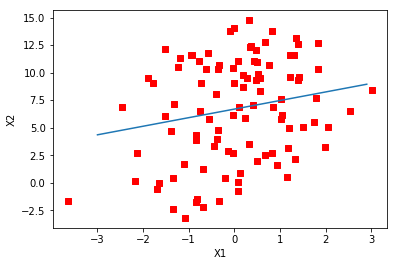

In [92]:
# test
plotBestFit(weights)